# Regularisation
This notebook explores regularisation. It uses the Ames "alternative to Boston Housing" data set. See here for details http://jse.amstat.org/v19n3/decock.pdf

## Imports

In [17]:
# Core libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score

## Load data, split into X and y and scale data

In [18]:
# Load the house prices data set
dataset = pd.read_csv("house_prices.csv")

# Split into X and y
y = dataset.SalesPrice
X = dataset.drop('SalesPrice', axis=1)
#X = X.loc[:, 'MS SubClass':'MS Zoning_RM']
X_dataset = X

# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [19]:
dataset.shape

(2930, 305)

In [20]:
dataset.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalesPrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,1,0,0,0,0,1,0,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,0,0,0,0,1,0,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,0,0,0,0,1,0,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,1,0,0,0,0,1,0,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,0,0,0,0,1,0,189900


## Split into train and test sets

In [21]:
# Train test split
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


## Build and evaluate a linear regression model

In [22]:
# Create model
model_lr = LinearRegression()

# Fit model
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_lr.predict(X_test)
print("Test:", r2_score(y_test, predictions))


Train: 0.9383542128013176
Test: -1.5479711580491715e+19


Oh dear!  Training score is very high, but test score is very low.  We must have overfitting.

## Build and evaluate a ridge regression model

In [23]:
# Create model
model_r = Ridge(alpha=2)

#Fit model
model_r.fit(X_train, y_train)
predictions = model_r.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_r.predict(X_test)
print("Test:", r2_score(y_test, predictions))


Train: 0.9251913512103855
Test: 0.8800181582163079


## Cross-validation build and evaluate a ridge regression model

In [24]:
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create model
model_rcv = RidgeCV(cv=kfold)

#Fit model
model_rcv.fit(X_train, y_train)
predictions = model_rcv.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_rcv.predict(X_test)
print("Test:", r2_score(y_test, predictions))

print("Alpha:", model_rcv.alpha_)

Train: 0.9060243584752139
Test: 0.8818617113087038
Alpha: 10.0


## Build and evaluate a lasso regression model

In [25]:
# Create model
model_l = Lasso(alpha=1)

# Fit model
model_l.fit(X_train, y_train)
predictions = model_l.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_l.predict(X_test)
print("Test:", r2_score(y_test, predictions))

Train: 0.9381307141916388
Test: 0.869940792687326


C:\Users\Gururajan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39303966140.56842, tolerance: 1231332816.433275
  model = cd_fast.enet_coordinate_descent(


## Cross-validation build and evaluate a lasso regression model

In [26]:
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create model
model_lcv = LassoCV(cv=kfold)

#Fit model
model_lcv.fit(X_train, y_train)
predictions = model_lcv.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_lcv.predict(X_test)
print("Test:", r2_score(y_test, predictions))

#model.coef_
print("Alpha:", model_lcv.alpha_)

Train: 0.928377201303416
Test: 0.8816306830317462
Alpha: 51.88722443267619


## Visualising the impact on coefficients

In [27]:
# Create a function to plot the magnitude of coefficients on a log scale
def plotCoef(model, info=""):
    # Plot the coeffients as bars
    fig = plt.figure(figsize=(15,4))
    fig.suptitle(type(model).__name__ + " " + info, fontsize=16)
    rects = plt.bar(np.arange(len(model.coef_)), model.coef_, color="lightblue")

    plt.gca().set_xticklabels([])
    plt.xticks([])
    plt.yscale('symlog')
    plt.show()

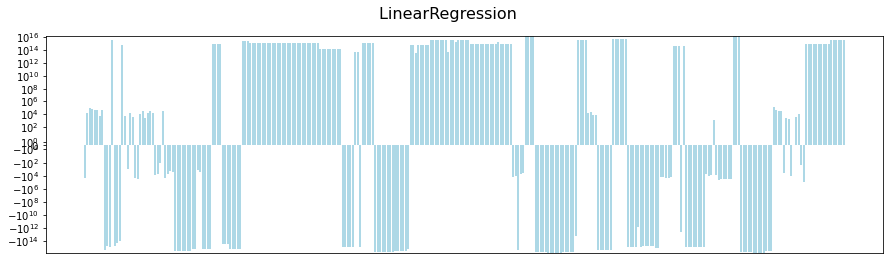

In [28]:
# Visualise linear regression coefficients
plotCoef(model_lr)

Train: 0.9304613194261746
Test: 0.8773390687664728


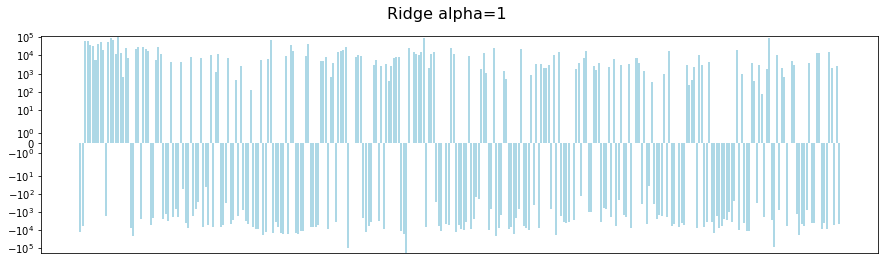

Train: 0.9251913512103855
Test: 0.8800181582163079


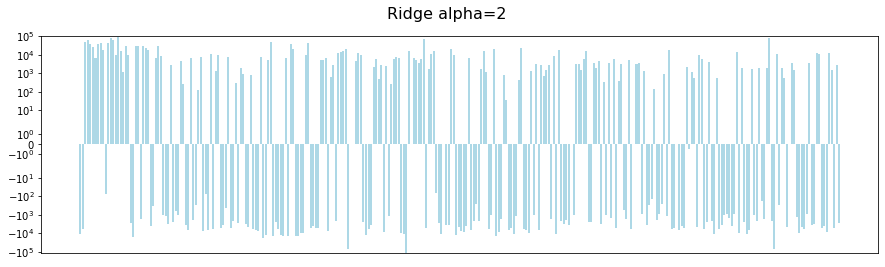

Train: 0.9212584542662589
Test: 0.8814153120684091


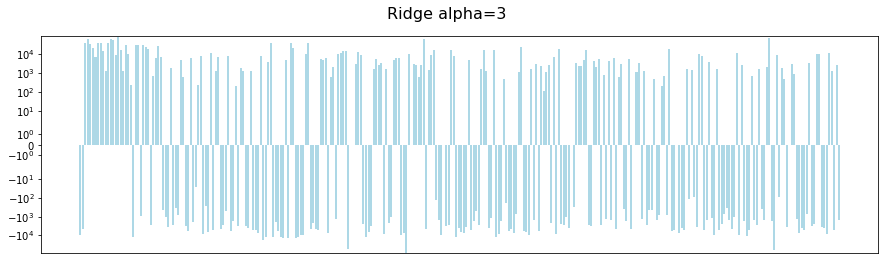

Train: 0.9181020103891121
Test: 0.882131918223321


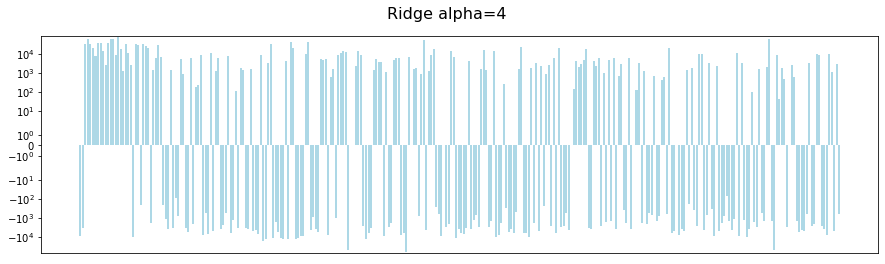

Train: 0.9154534610146456
Test: 0.8824664885288805


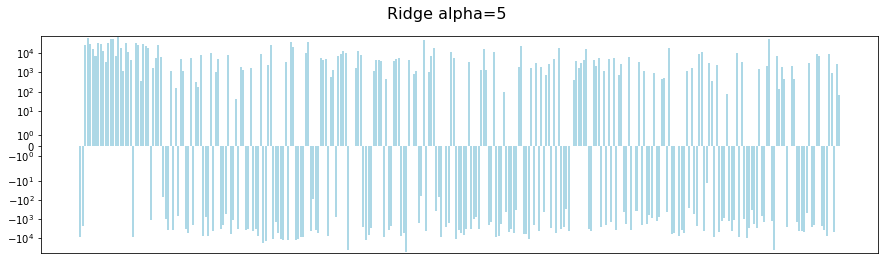

Train: 0.9131589903780858
Test: 0.8825688647270258


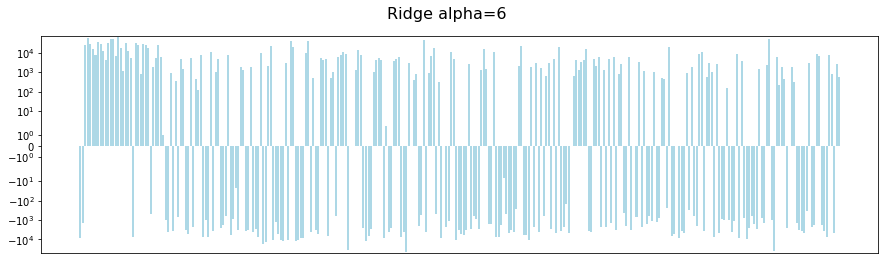

Train: 0.9111227804436782
Test: 0.8825203391748205


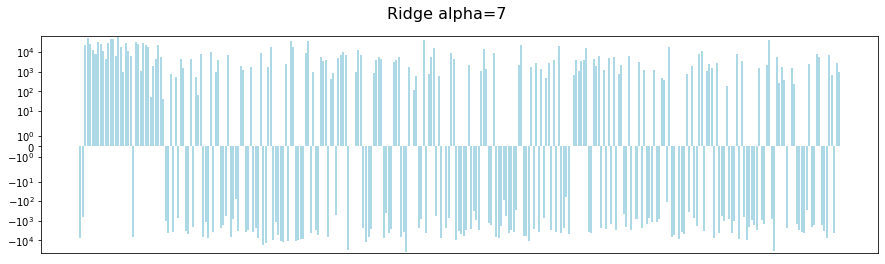

Train: 0.9092817381700808
Test: 0.8823683651802771


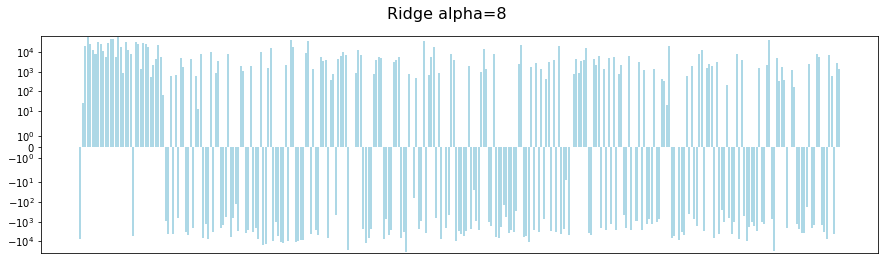

Train: 0.9075925292719166
Test: 0.8821424048635212


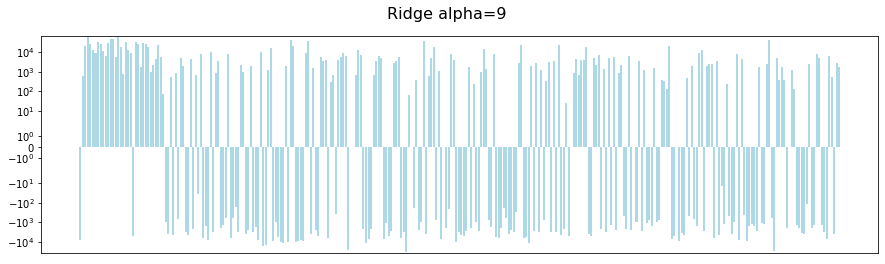

Train: 0.9060243584752139
Test: 0.8818617113087038


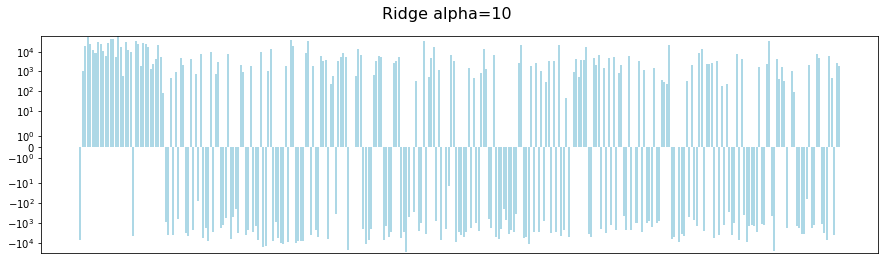

In [29]:
# Visualise Ridge regression coefficients for different alphas
coefs_r = []
for alpha in range(1,11, 1):
    # Create model
    model = Ridge(alpha=alpha)

    #Fit model
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print("Train:", r2_score(y_train, predictions))

    # Evaluate
    predictions = model.predict(X_test)
    print("Test:", r2_score(y_test, predictions))
    
    plotCoef(model, "alpha="+str(alpha))
    coefs_r.append(model.coef_)

Train: 0.9365974795130201
Test: 0.8756094898808342


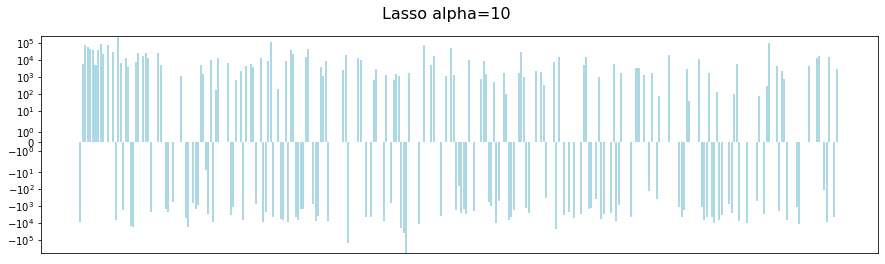

Train: 0.9345921125389752
Test: 0.8780272330919205


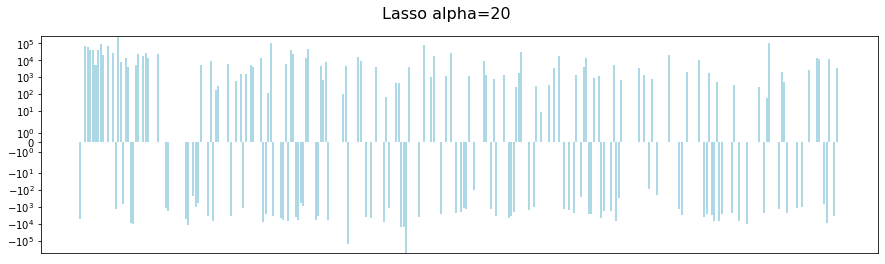

Train: 0.9326538466367105
Test: 0.8793619973172934


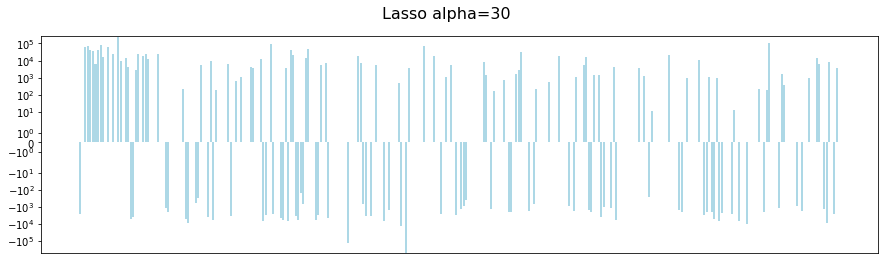

Train: 0.9307410689189914
Test: 0.8805003603058328


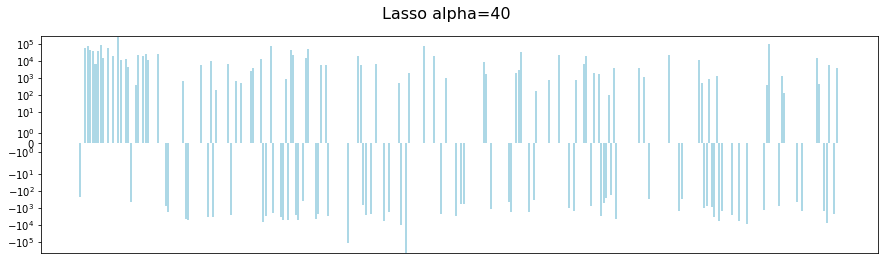

Train: 0.9287734754550877
Test: 0.8814590408259797


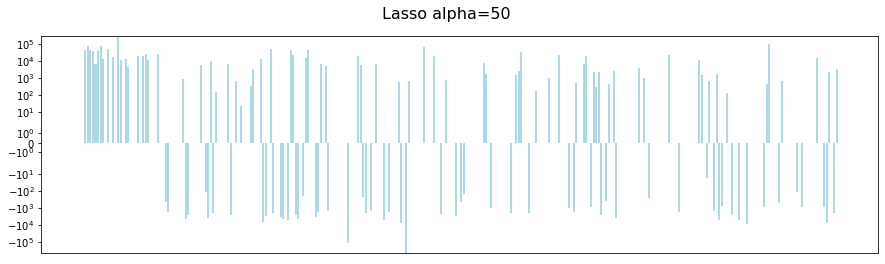

Train: 0.9266003399637421
Test: 0.882257275606496


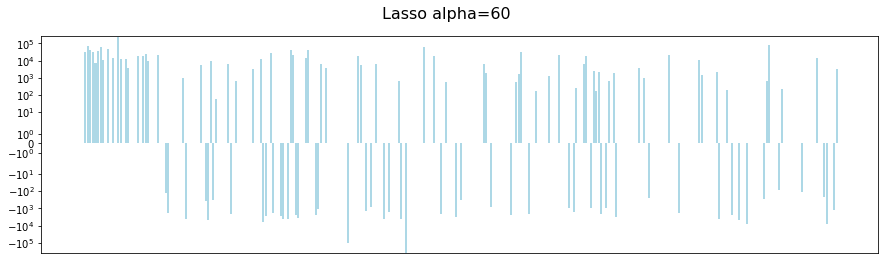

Train: 0.9243850093205814
Test: 0.882810241630722


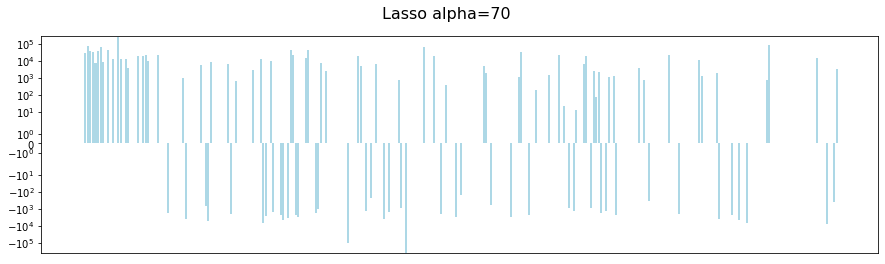

Train: 0.9222224700211966
Test: 0.8833018641834489


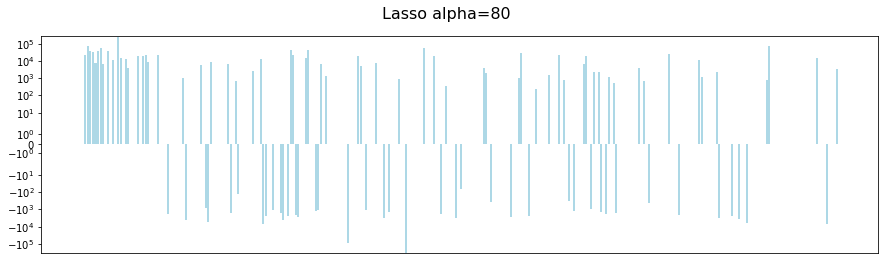

Train: 0.9200556447974929
Test: 0.8838742315788605


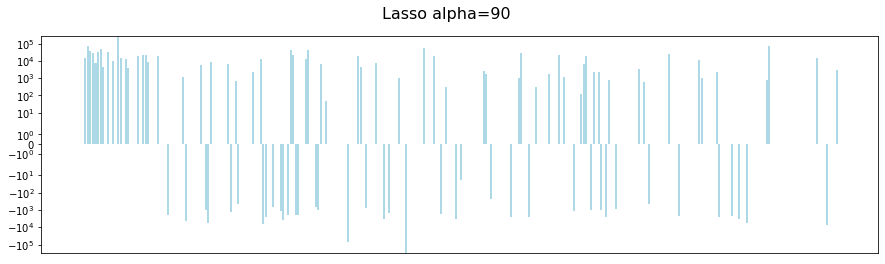

Train: 0.9176974731301659
Test: 0.8843424027867363


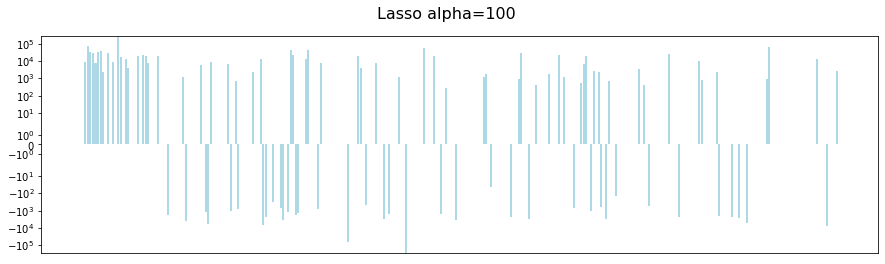

In [31]:
# Visualise Lasso regression coefficients for different alphas
coefs_l = []
for alpha in range(10,110, 10):
    # Create model
    model = Lasso(alpha=alpha)

    #Fit model
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print("Train:", r2_score(y_train, predictions))

    # Evaluate
    predictions = model.predict(X_test)
    print("Test:", r2_score(y_test, predictions))
    
    plotCoef(model, "alpha="+str(alpha))
    coefs_l.append(model.coef_)

### Examination to show that the increase in alpha reduces the total magnitude of the coefficients

In [32]:
# Prove that Ridge is reducing overall magnitude of coeficients with increasing alpha
# Should return an array of diminishing values
np.sum(abs(np.array(coefs_r)), axis=1)

array([3160963.52159404, 2686346.38063225, 2428769.60753907,
       2260153.65292575, 2137842.22709569, 2046157.78915205,
       1971247.46120216, 1908324.7379243 , 1855508.54859979,
       1810190.51474467])

In [33]:
# Prove that Lasso is reducing overall magnitude of coeficients with increasing alpha
# Should return an array of diminishing values
np.sum(abs(np.array(coefs_l)), axis=1)

array([2989283.50698202, 2558057.33127558, 2310494.72901756,
       2138163.01693136, 2000615.54366555, 1876478.30912404,
       1769432.81342888, 1678601.09273419, 1598631.10994075,
       1520765.32139805])